In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tanzanian Water Pumps
A priori knowledge about the project:

* Client: Tanzanian Ministry of Water
* Top priority: access to clean water for the whole population
* Dataset: Containing data regarding samples of all water pumps
* 3 Labels: functional, functional needs repair, non functional
* Features such as location, water quality, construction year, etc.
* Feature description: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

Data Import

In [8]:
feature_filename = "data/Features.csv"
label_filename = "data/Labels.csv"
df_feat = pd.read_csv(feature_filename)
df_label = pd.read_csv(label_filename)
df = pd.merge(df_feat, df_label, on='id', how='inner')

# Data Understanding
This notebook contains the second part of the data understanding process. Here, I am going to focus on the categorical features.

# Categorical Features

### funder

<AxesSubplot:xlabel='funder', ylabel='Count'>

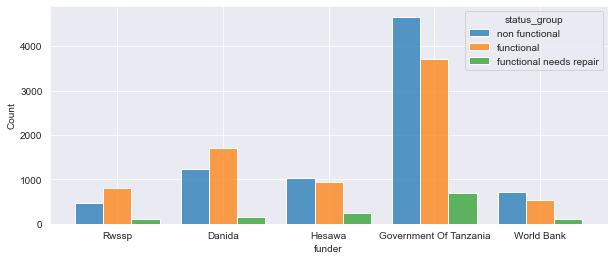

In [9]:
plt.figure(figsize=(10,4))
sns.histplot(data=df[df["funder"].isin(df["funder"].value_counts()[:5].index)], x="funder", hue="status_group", multiple="dodge", shrink=0.8)

For some organizations like the Government of Tanzania, the percentage of non-functional water pumps is very high.
Decision: Keep feature

### installer - Organization that installed the well

<AxesSubplot:xlabel='installer', ylabel='Count'>

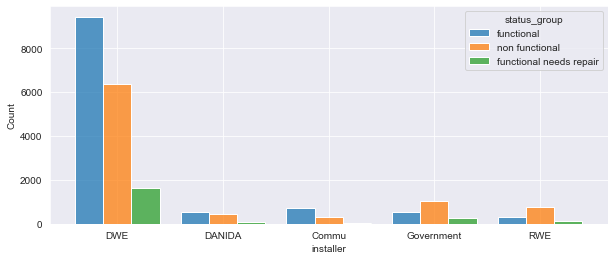

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=df[df["installer"].isin(df["installer"].value_counts()[:5].index)], x="installer", hue="status_group", multiple="dodge", shrink=0.8)

Water pumps installed by the entities Government and RWE seem to be more prone to malfunction (in need of repair or non functional).
Decision: keep feature

### wpt_name - Name of the waterpoint if there is one

In [11]:
df["wpt_name"].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

As of now, the feature wpt_name does not provide useful information. Decision: drop feature

### Location
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* lga - Geographic location
* ward - Geographic location

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64 



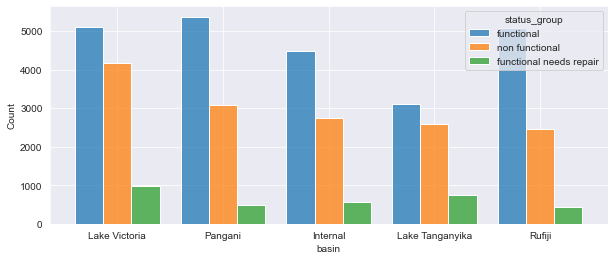

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64 



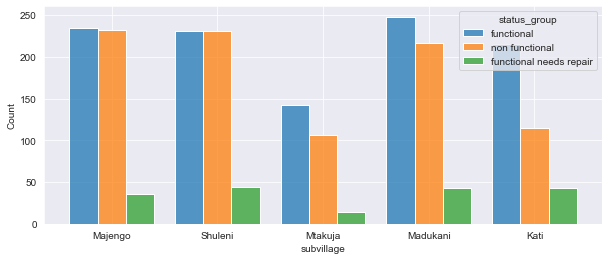

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64 



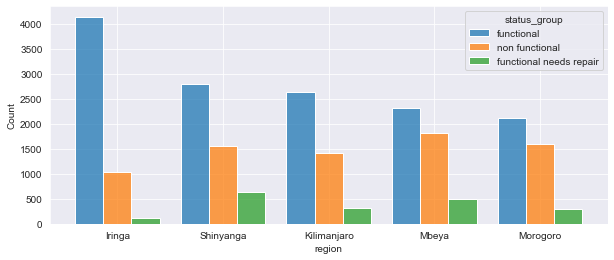

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64 



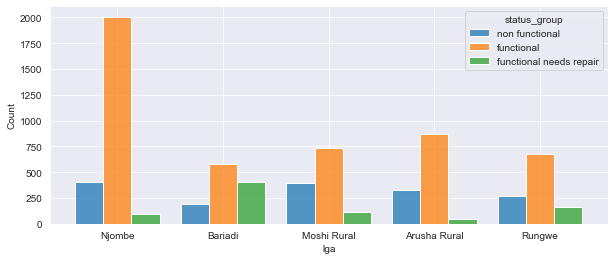

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64 



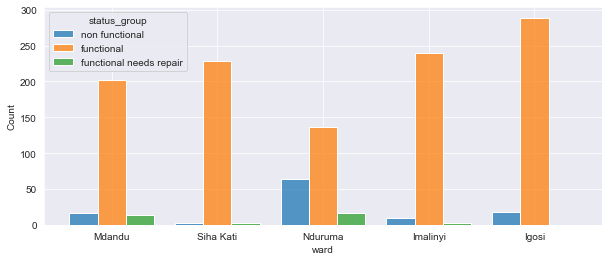

In [12]:
for att in ["basin", "subvillage", "region", "lga", "ward"]:
    print(df[att].value_counts(), "\n")
    plt.figure(figsize=(10,4))
    sns.histplot(data=df[df[att].isin(df[att].value_counts()[:5].index)], x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

As of now, the features subvillage, lga and ward do not seem to provide useful information. Decision: drop features
The features basin and region might provide valuable information in the analysis of the findings (e.g. for visualizations). Decision: Keep features

### source

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64 



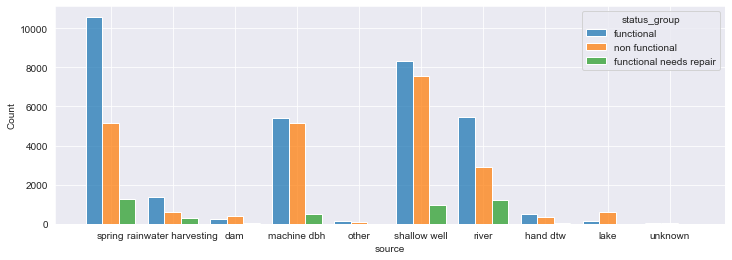

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64 



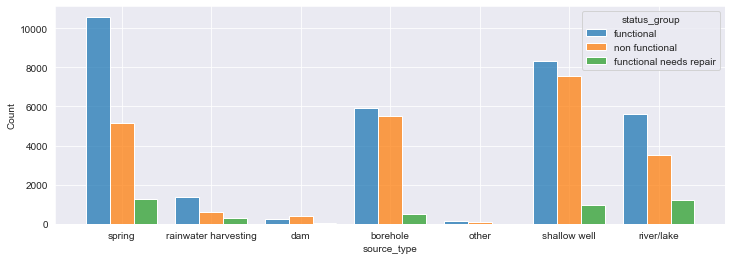

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64 



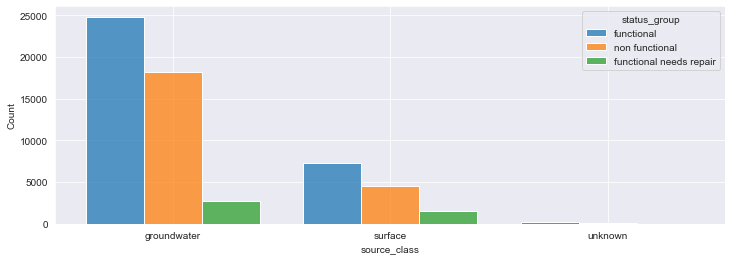

In [13]:
for att in ["source", "source_type", "source_class"]:
    print(df[att].value_counts(), "\n")
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

Interesting finding: borehole water pumps and shallow well water pumps seem to be more prone to malfunction than pumps drawing water from springs or rivers/lakes. Need to drop sources with tags "other" or "unknown" since no additional information is available.
Decision: keep source feature but drop source_type and source_class features (do not provide additional value)

### Payment
* payment - What the water costs
* payment_type - What the water costs

['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly'] 



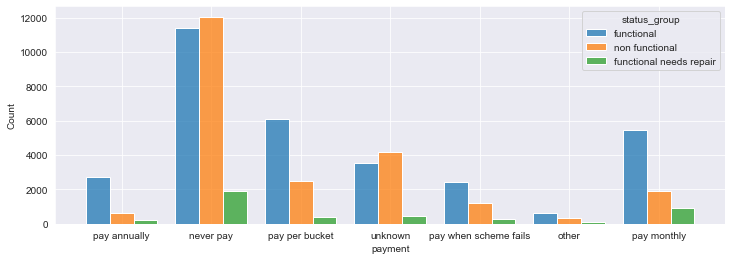

['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly'] 



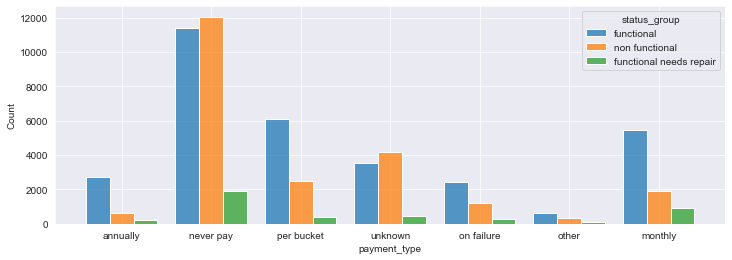

In [14]:
for att in ["payment", "payment_type"]:
    print(df[att].unique(), "\n")
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

Finding: If water is for free, water pumps are in worse condition.
Decision: Drop payment attribute, keep payment_type attribute

### Extraction Type
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses

['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga'] 



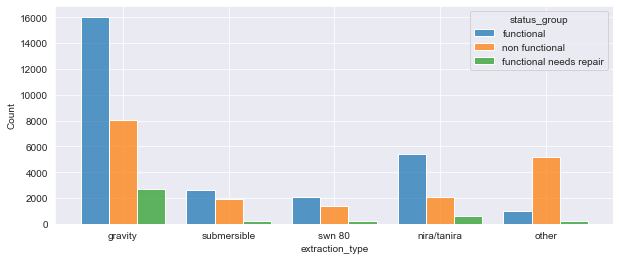

['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump'] 



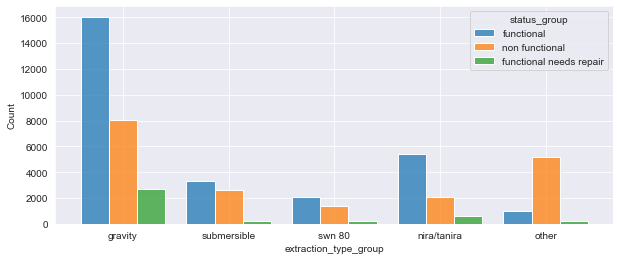

['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump'] 



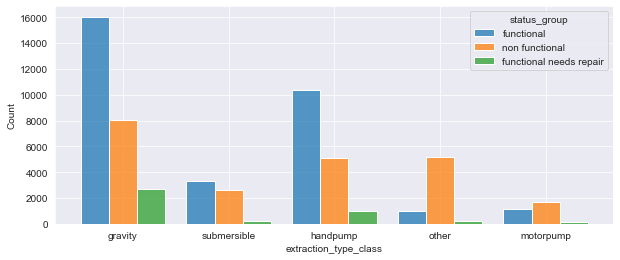

In [15]:
for att in ["extraction_type", "extraction_type_group", "extraction_type_class"]:
    print(df[att].unique(), "\n")
    plt.figure(figsize=(10,4))
    sns.histplot(data=df[df[att].isin(df[att].value_counts()[:5].index)], x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

Decision: drop all three features, does not seem to provide valuable information

### Water quality/quantity
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water

['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned'] 



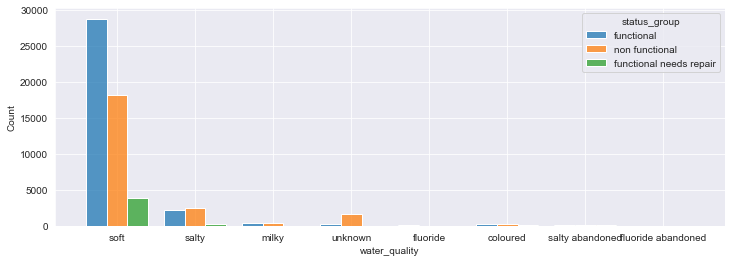

['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored'] 



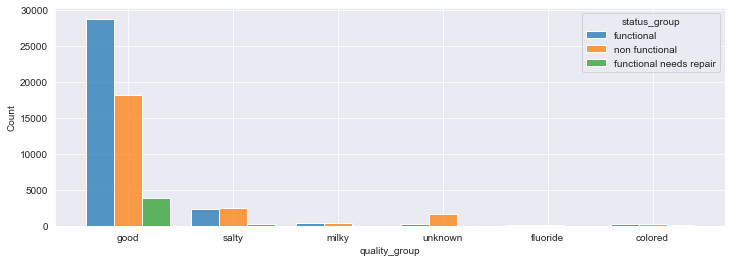

['enough' 'insufficient' 'dry' 'seasonal' 'unknown'] 



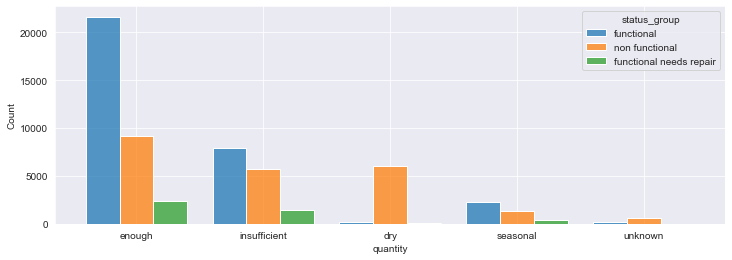

['enough' 'insufficient' 'dry' 'seasonal' 'unknown'] 



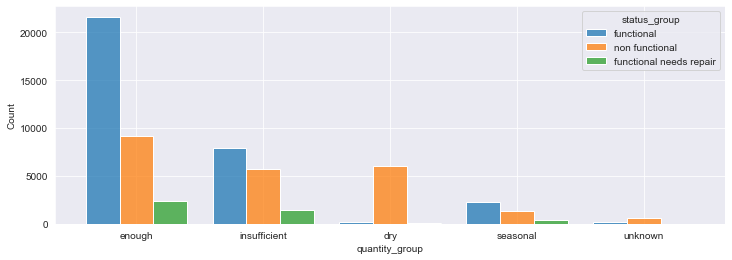

In [16]:
for att in ["water_quality", "quality_group", "quantity", "quantity_group"]:
    print(df[att].unique(), "\n")
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

Finding: Water quantity seems to have a strong connection to functionality of the water pump.
Decision: drop water_quality, quality_group and quantity group attributes
but keep quantity attribute since it provides valuable information

### Waterpoint type
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam'] 



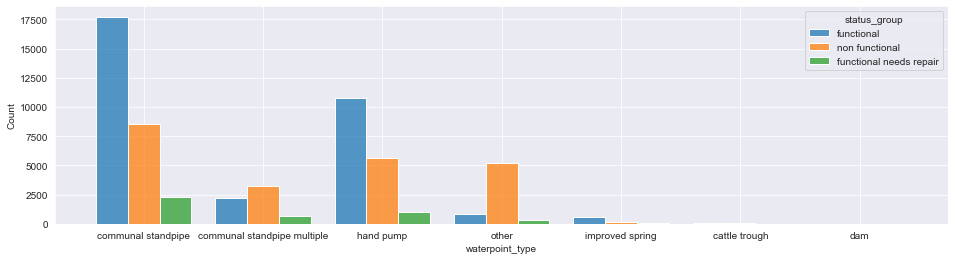

['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam'] 



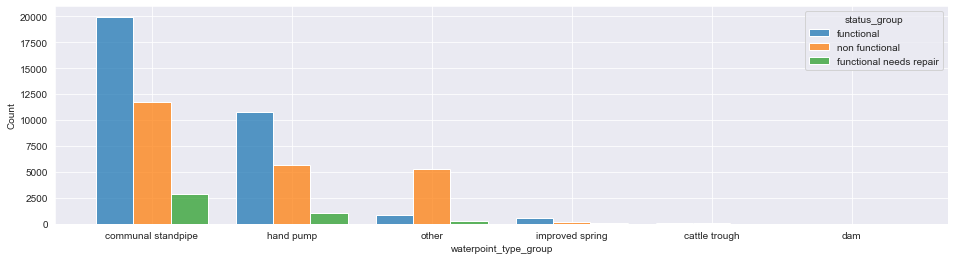

In [17]:
for att in ["waterpoint_type", "waterpoint_type_group"]:
    print(df[att].unique(), "\n")
    plt.figure(figsize=(16,4))
    sns.histplot(data=df, x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

Finding: other types of waterpoints seem to be more prone to malfunction.
Decision: drop waterpoint_type_group feature but keep waterpoint_type feature

### Others
* public meeting
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* permit - If the waterpoint is permitted
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed

['GeoData Consultants Ltd'] 



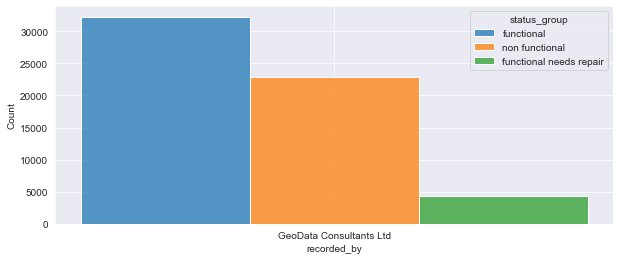

['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None'] 



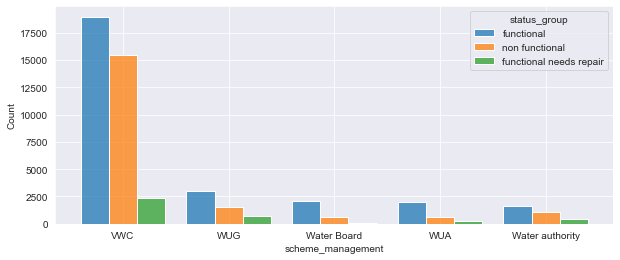

['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust'] 



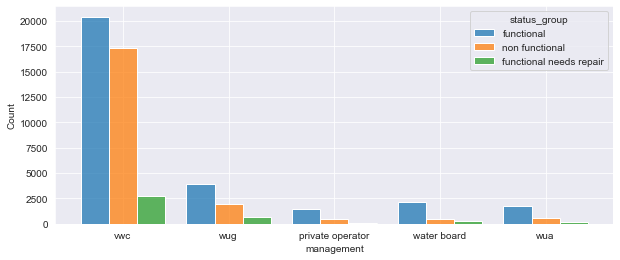

['user-group' 'other' 'commercial' 'parastatal' 'unknown'] 



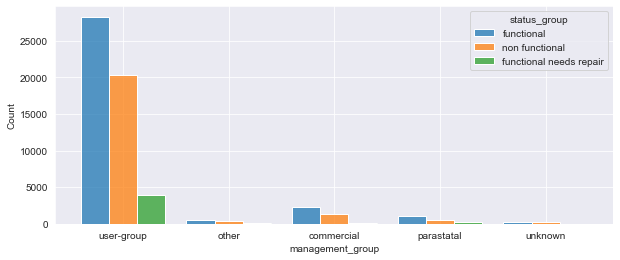

In [18]:
for att in ["recorded_by", "scheme_management", "management", "management_group"]:
    print(df[att].unique(), "\n")
    plt.figure(figsize=(10,4))
    sns.histplot(data=df[df[att].isin(df[att].value_counts()[:5].index)], x=att, hue="status_group", multiple="dodge", shrink=0.8)
    plt.show()

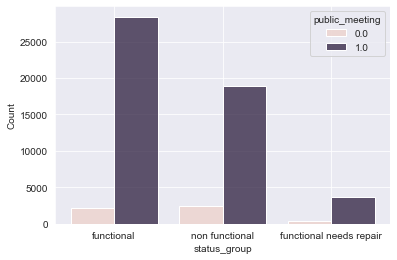

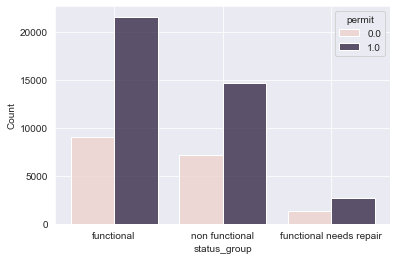

In [19]:
for att in ["public_meeting", "permit"]:
    df[att].value_counts()
    sns.histplot(data=df, x="status_group", hue=att, multiple="dodge", shrink=0.8) #different approach for boolean attribute to avoid error
    plt.show()

Decision: drop features: public_meeting, recorded_by, permit, scheme management, management, management_group